# Лабораторная работа №1. 

Данная лабораторная работа состоит из нескольких блоков. В каждом блоке вам предлагается произвести некоторые манипуляции с данными и сделать некоторые выводы.
* Задавать вопросы можно и нужно.
* Списывать не нужно. Работы, которые были списаны обнуляются.
* Блоки выполняются последовательно и оцениваются отдельно.

##  Part 2. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

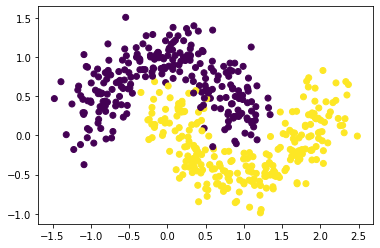

In [2]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from mlxtend.plotting import plot_decision_regions

lr = LogisticRegression(solver='sag', C=0.9) # add some params
svm = SVC(kernel='linear', C=0.9) # here too

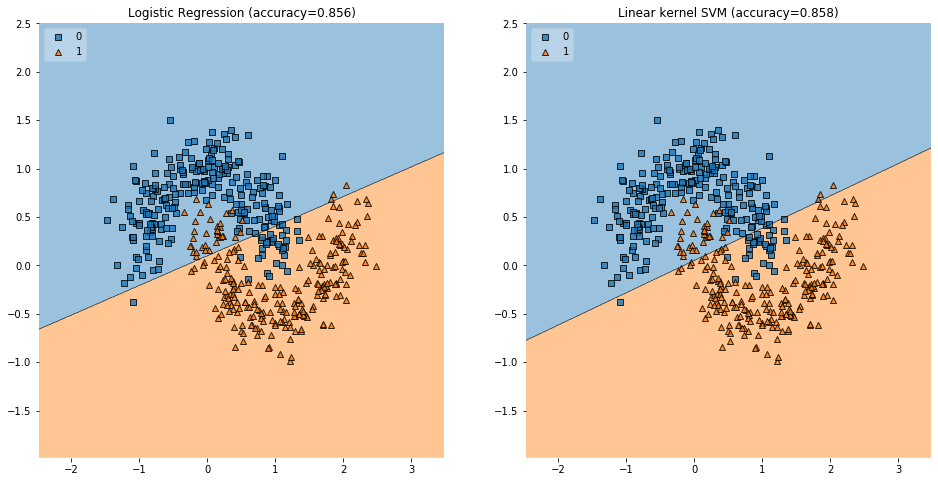

In [6]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.metrics import accuracy_score
import itertools

gs = gridspec.GridSpec(1, 2)
fig = plt.figure(figsize=(16, 8))

for clf, lab, grd in zip([lr, svm],
                         ['Logistic Regression', 'Linear kernel SVM'],
                         itertools.product([0,1],
                         repeat=2)):
    clf.fit(moons_points, moons_labels)
    ax = plt.subplot(gs[grd])
    fig = plot_decision_regions(X=moons_points, y=moons_labels, clf=clf, legend=2)
    accuracy = accuracy_score(moons_labels, clf.predict(moons_points))
    plt.title(lab + f' (accuracy={accuracy})')
plt.show()

__Выводы.__ Наверное самым простым и видным сдесь будет то, что так как мы работаем с простой логистической регрессией и SVM с простым линейным классификатором, то в целом модели дают похожий результат на относительно простой для разделения выборке.

P.S. Простой для разедения линейными моделями - наверное будет корректнее.

## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

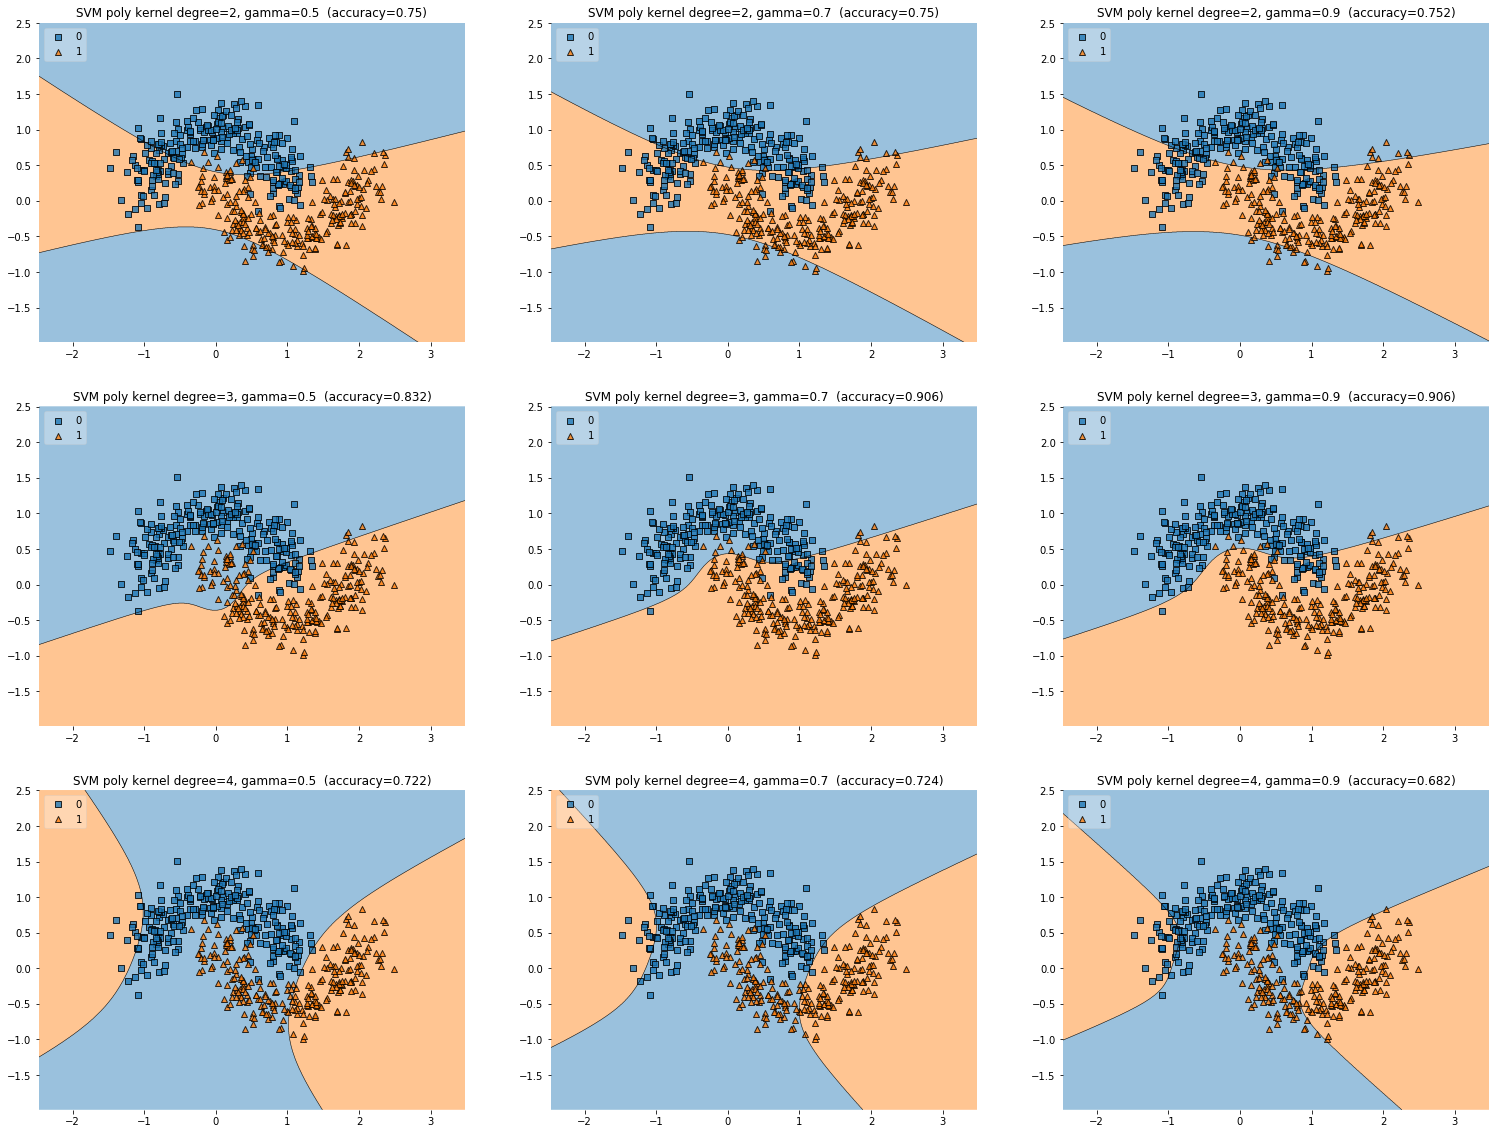

In [7]:
degrees = [2, 3, 4]
gammas = [0.5, 0.7, 0.9]
models = [SVC(kernel='poly', degree=d, gamma=g) for d in degrees for g in gammas]
labels = [f'SVM poly kernel degree={d}, gamma={g}' for d in degrees for g in gammas]

gs = gridspec.GridSpec(3, 3)
fig = plt.figure(figsize=(26, 20))

for clf, lab, grd in zip(models,
                         labels,
                         itertools.product([0, 1, 2],
                         repeat=2)):
    clf.fit(moons_points, moons_labels)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=moons_points, y=moons_labels, clf=clf, legend=2)
    accuracy = accuracy_score(moons_labels, clf.predict(moons_points))
    plt.title(lab + f'  (accuracy={accuracy})')
plt.show()

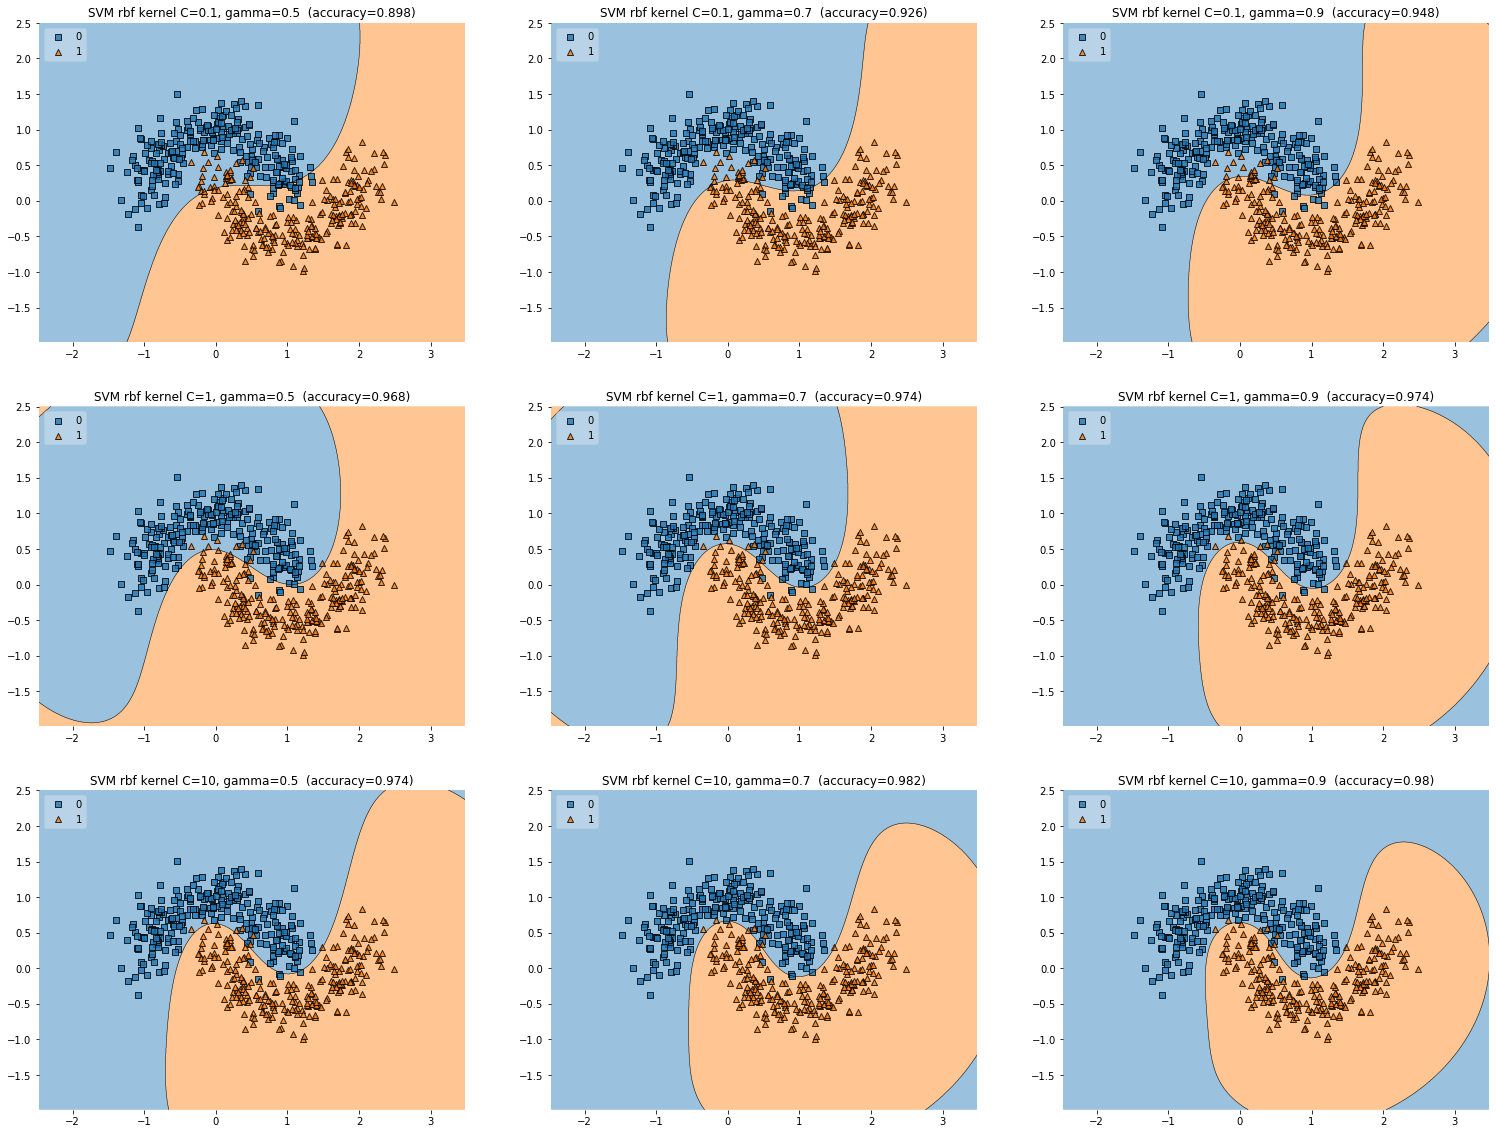

In [8]:
Cs = [0.1, 1, 10]
gammas = [0.5, 0.7, 0.9]
models = [SVC(kernel='rbf', C=c, gamma=g) for c in Cs for g in gammas]
labels = [f'SVM rbf kernel C={c}, gamma={g}' for c in Cs for g in gammas]

gs = gridspec.GridSpec(3, 3)
fig = plt.figure(figsize=(26, 20))

for clf, lab, grd in zip(models,
                         labels,
                         itertools.product([0, 1, 2],
                         repeat=2)):
    clf.fit(moons_points, moons_labels)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=moons_points, y=moons_labels, clf=clf, legend=2)
    accuracy = accuracy_score(moons_labels, clf.predict(moons_points))
    plt.title(lab + f'  (accuracy={accuracy})')
plt.show()

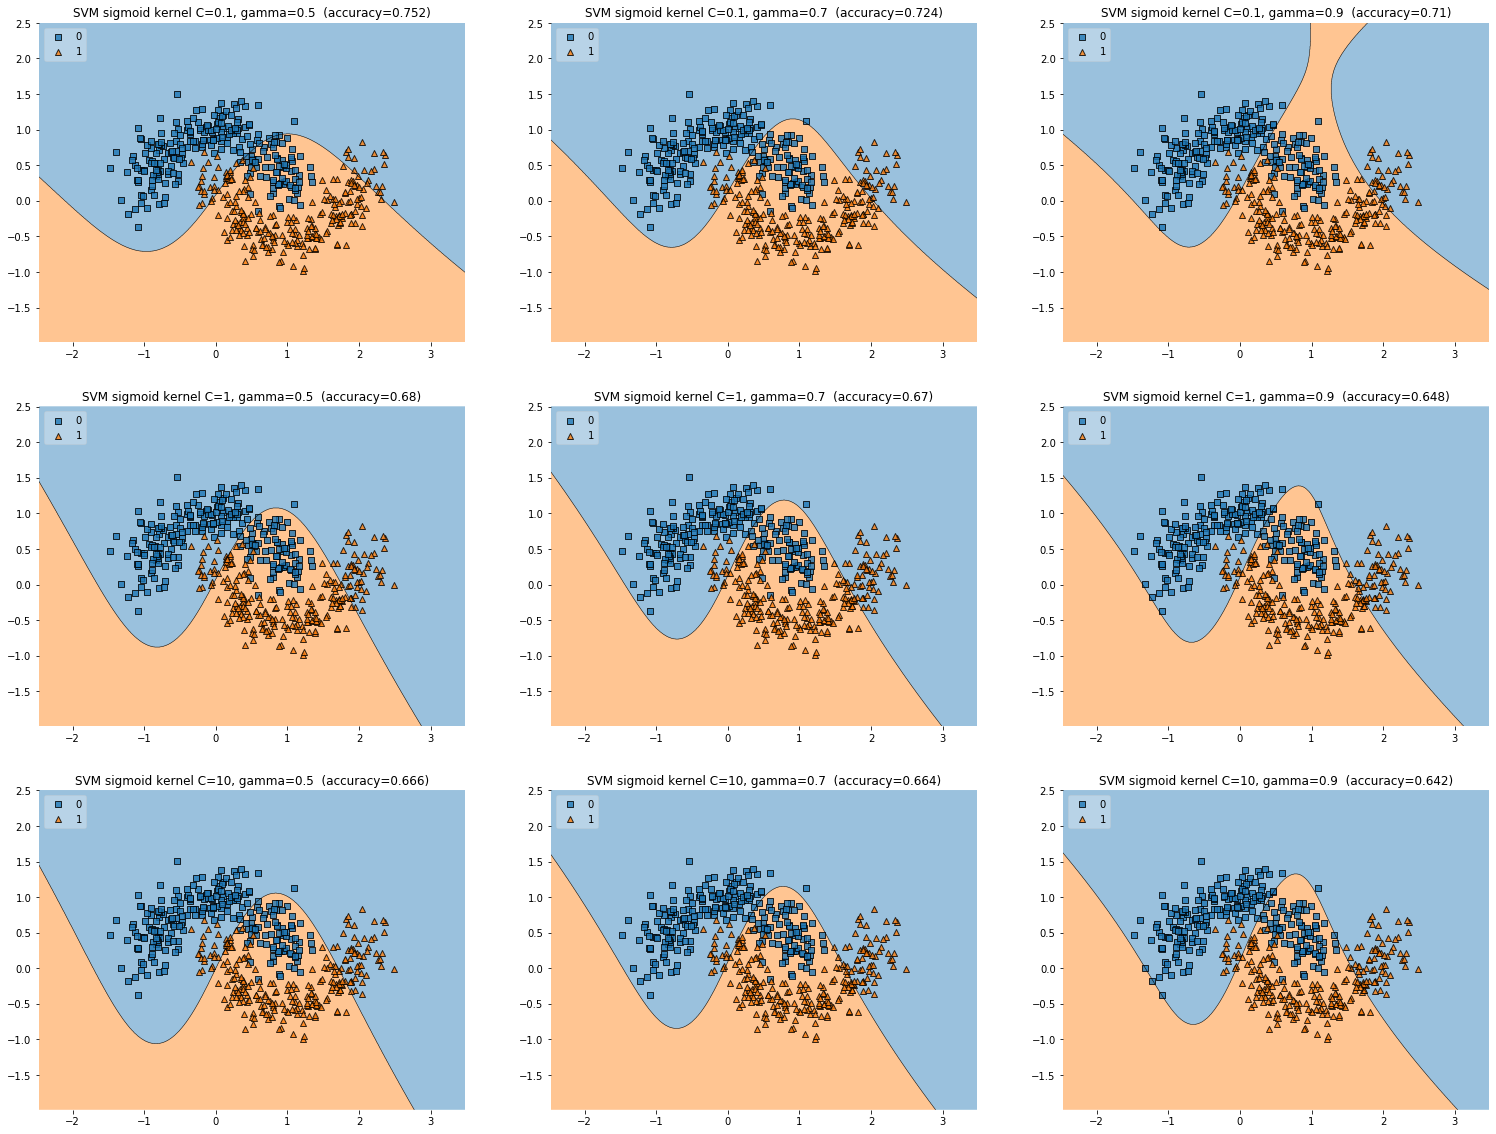

In [20]:
Cs = [0.1, 1, 10]
gammas = [0.5, 0.7, 0.9]
models = [SVC(kernel='sigmoid', C=c, gamma=g) for c in Cs for g in gammas]
labels = [f'SVM sigmoid kernel C={c}, gamma={g}' for c in Cs for g in gammas]

gs = gridspec.GridSpec(3, 3)
fig = plt.figure(figsize=(26, 20))

for clf, lab, grd in zip(models,
                         labels,
                         itertools.product([0, 1, 2],
                         repeat=2)):
    clf.fit(moons_points, moons_labels)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=moons_points, y=moons_labels, clf=clf, legend=2)
    accuracy = accuracy_score(moons_labels, clf.predict(moons_points))
    plt.title(lab + f'  (accuracy={accuracy})')
plt.show()

__Выводы__
* What have happenned with classification quality?

Если смотреть по перебору ядер `poly`, `rbf`, `sigmoid`, то видно что хуже всех последнее ядро и скорее всего это говорит о том что представленная зависимость данных плохо описывается такой зависимостью. Первые два ядра дали стабильные Accuracy выше 0.9. Лучшим стало ядро `rbf`. 

P.S. Если не ошибаюсь, то вроде бы к этой задаче можно настроить sigmoid.

* How did decision border changed for each kernel?

Никогда не думал что будут проблемы с английским, но думаю что можно перевести как: "Как изменяются границы решений / классификации моделей для каждого из ядер?"

Исходя из структуры данных модели с наилучшими качествами предсказаний делают разделение классов по нелинейной зависимости.

* What `degree` have you chosen and why?

Исходя из качества классификации и в целом по картинке - полином 3 степени.


## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

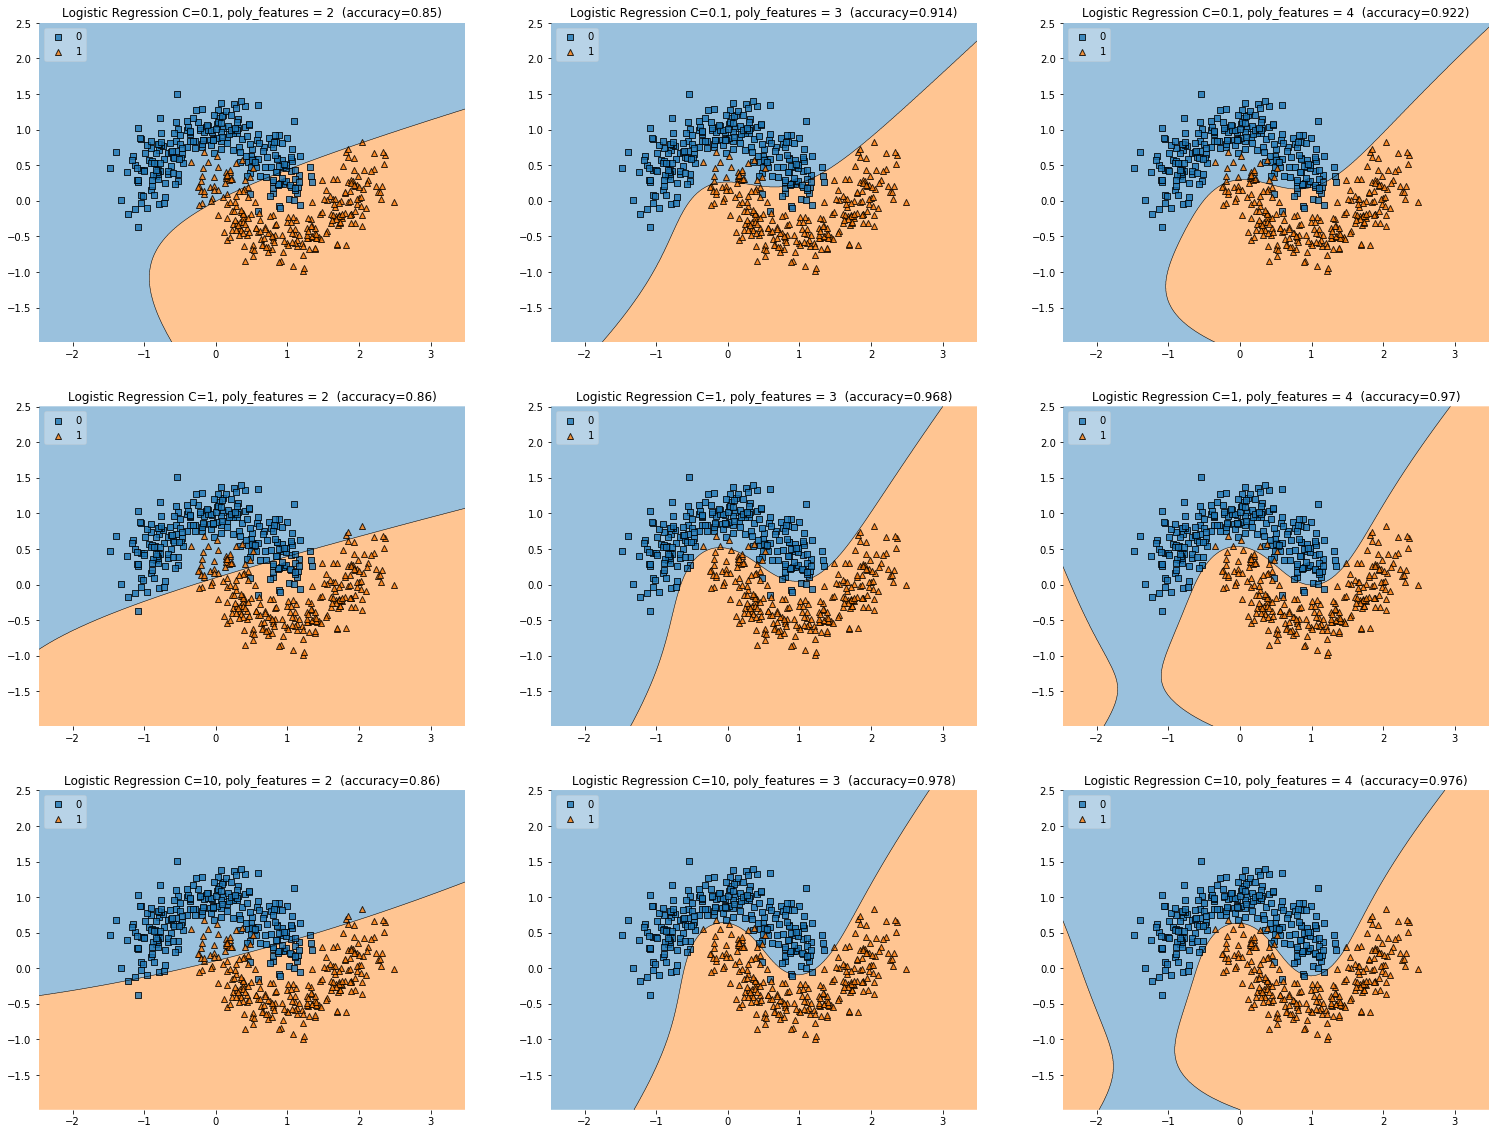

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

Cs = [0.1, 1, 10]
degrees = [2, 3, 4]
models = [make_pipeline(PolynomialFeatures(degree), \
LogisticRegression(solver='sag', C=c, max_iter=10000)) for c in Cs for degree in degrees]
labels = [f'Logistic Regression C={c}, poly_features = {degree}' for c in Cs for degree in degrees]

gs = gridspec.GridSpec(3, 3)
fig = plt.figure(figsize=(26, 20))

for clf, lab, grd in zip(models,
                         labels,
                         itertools.product([0, 1, 2],
                         repeat=2)):
    clf.fit(moons_points, moons_labels)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=moons_points, y=moons_labels, clf=clf, legend=2)
    accuracy = accuracy_score(moons_labels, clf.predict(moons_points))
    plt.title(lab + f'  (accuracy={accuracy})')
plt.show()

__Выводы__
* Comare SVM's results with this solution (quality, borders type)

Качество моделей стало заметно лучше.

Если говорить про границы разделения классов - то да, часть из них слега нелепа, но в итоге хорошее качества всегда дают модели с нелинейными зависимостями. 

Лучшая модель логистическая регрессия с `poly_feature=3` 

* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

2, 3, 4. Лучшим оказался полином 3 степени.

Но как я в итоге видно, последние модели имеют более качественный результат.

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

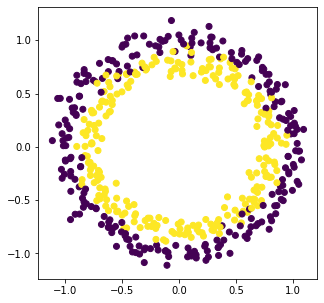

In [10]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

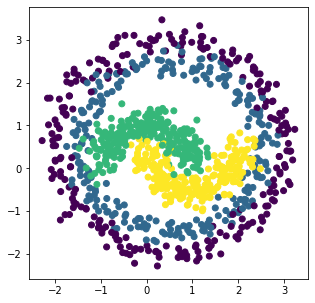

In [11]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

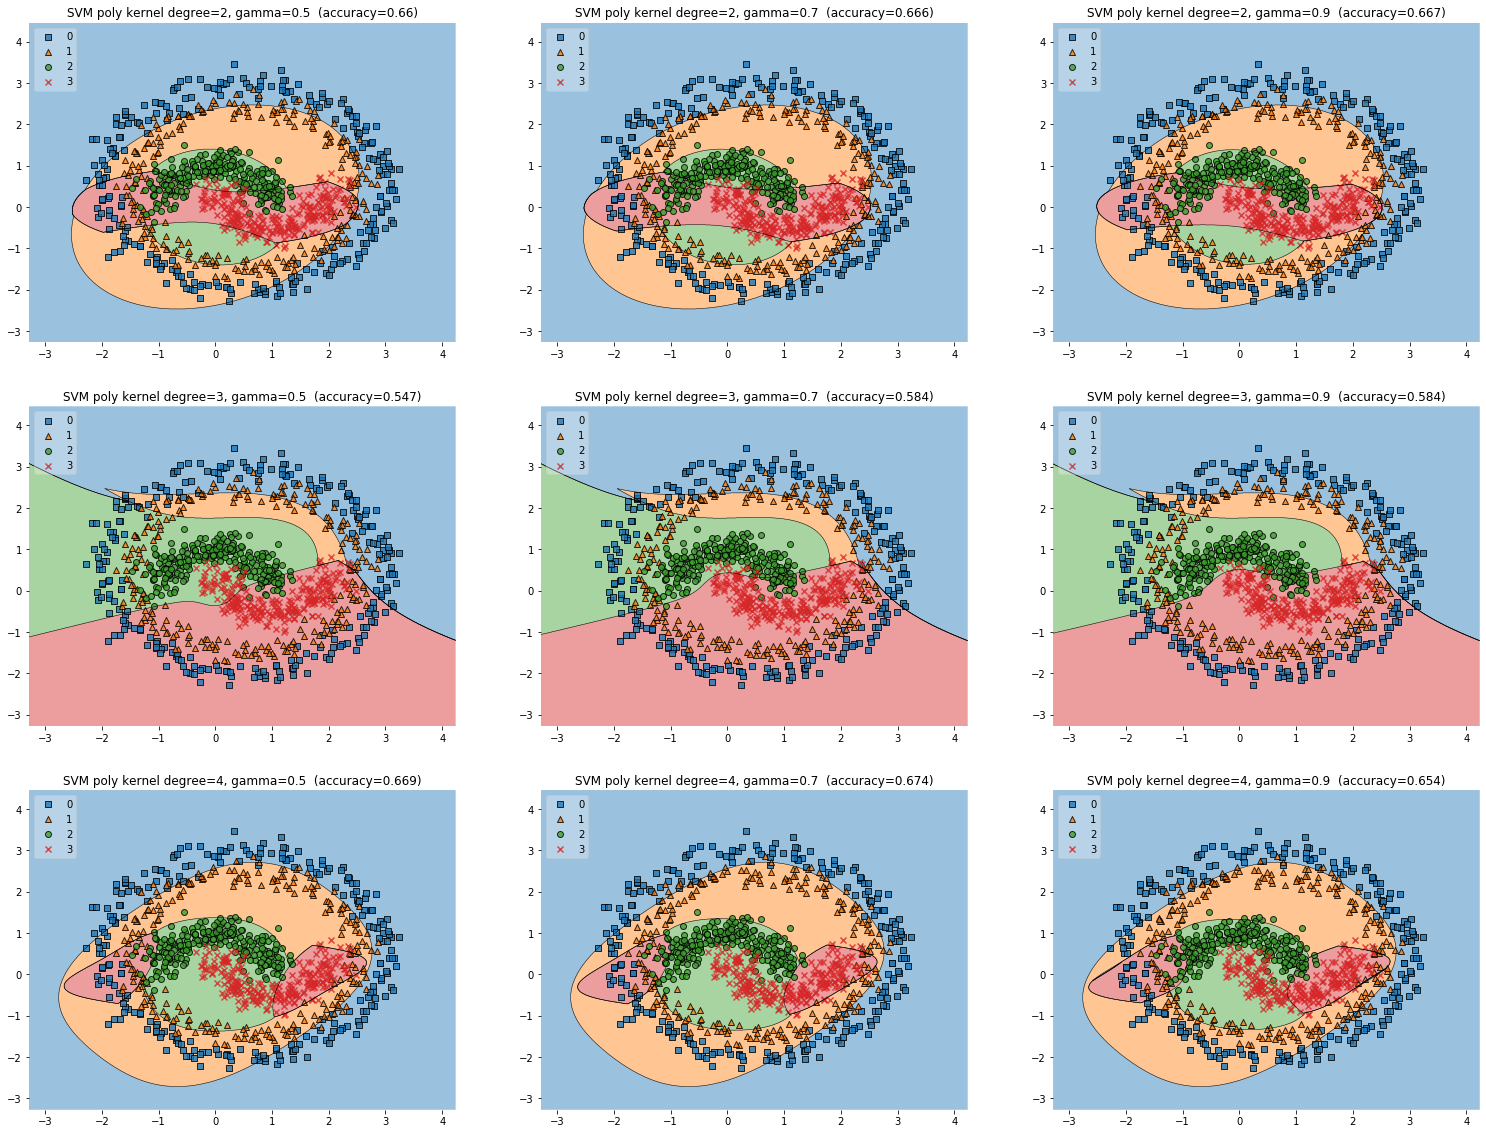

In [12]:
degrees = [2, 3, 4]
gammas = [0.5, 0.7, 0.9]
models = [SVC(kernel='poly', degree=d, gamma=g) for d in degrees for g in gammas]
labels_ = [f'SVM poly kernel degree={d}, gamma={g}' for d in degrees for g in gammas]

gs = gridspec.GridSpec(3, 3)
fig = plt.figure(figsize=(26, 20))

for clf, lab, grd in zip(models,
                         labels_,
                         itertools.product([0, 1, 2],
                         repeat=2)):
    clf.fit(points, labels)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=points, y=labels, clf=clf, legend=2)
    accuracy = accuracy_score(labels, clf.predict(points))
    plt.title(lab + f'  (accuracy={accuracy})')
plt.show()

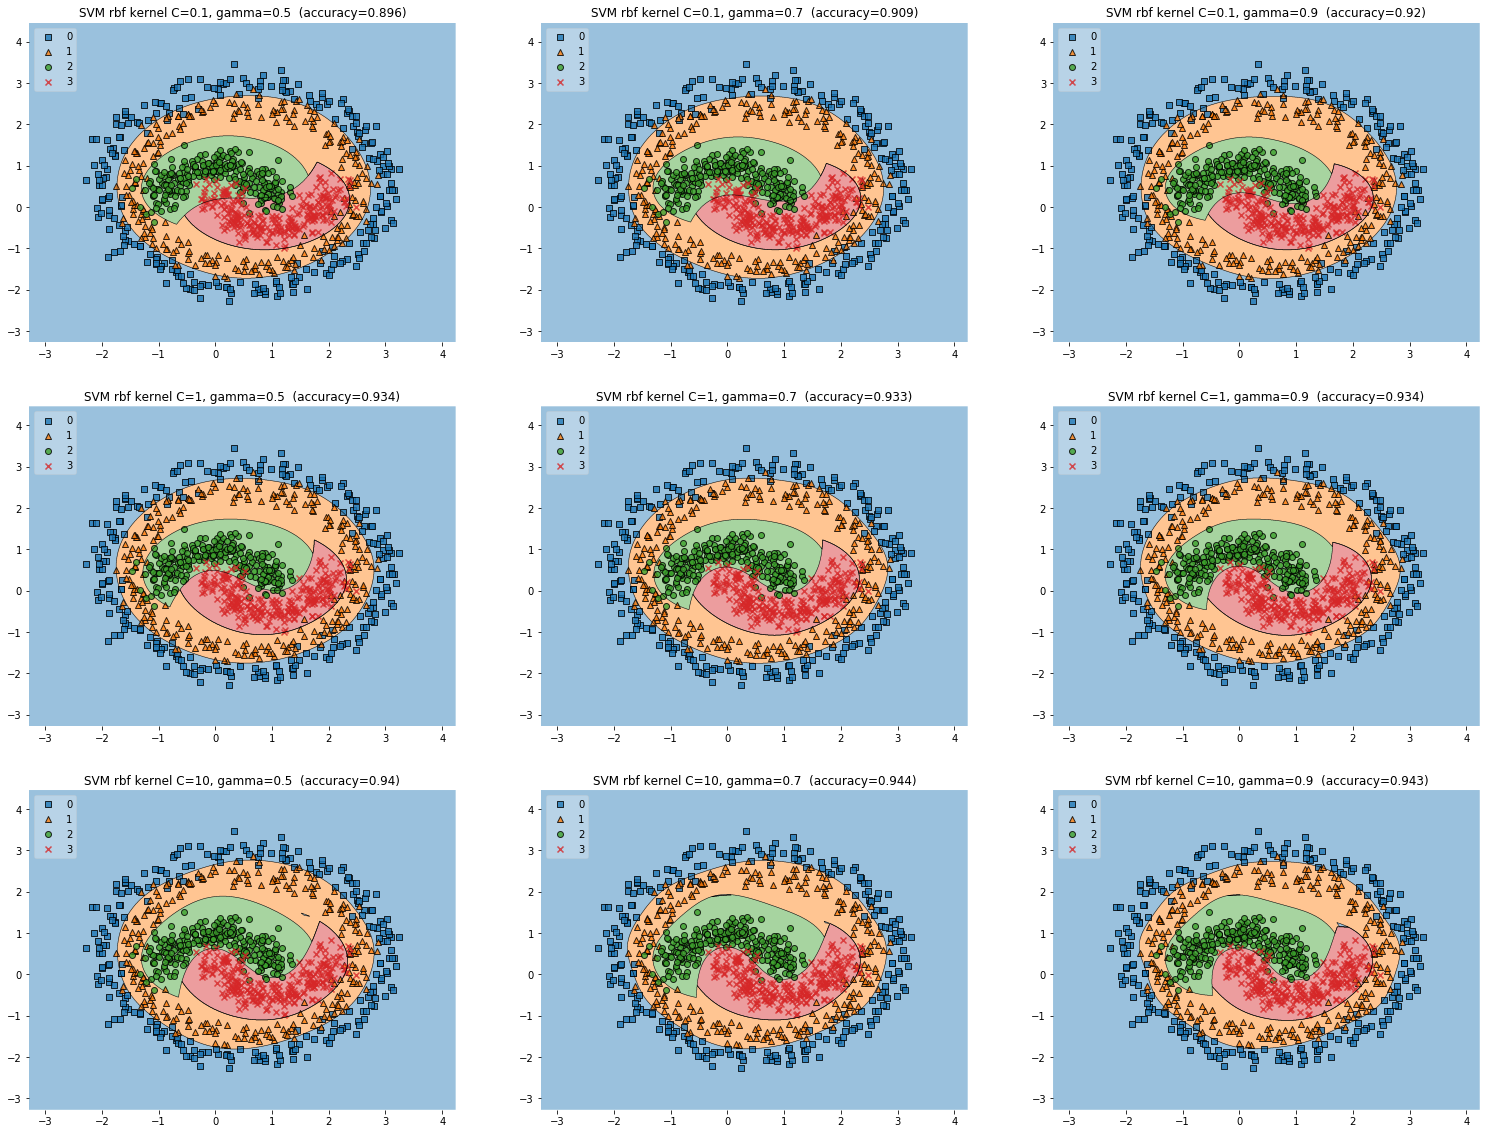

In [13]:
Cs = [0.1, 1, 10]
gammas = [0.5, 0.7, 0.9]
models = [SVC(kernel='rbf', C=c, gamma=g) for c in Cs for g in gammas]
labels_ = [f'SVM rbf kernel C={c}, gamma={g}' for c in Cs for g in gammas]

gs = gridspec.GridSpec(3, 3)
fig = plt.figure(figsize=(26, 20))

for clf, lab, grd in zip(models,
                         labels_,
                         itertools.product([0, 1, 2],
                         repeat=2)):
    clf.fit(points, labels)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=points, y=labels, clf=clf, legend=2)
    accuracy = accuracy_score(labels, clf.predict(points))
    plt.title(lab + f'  (accuracy={accuracy})')
plt.show()

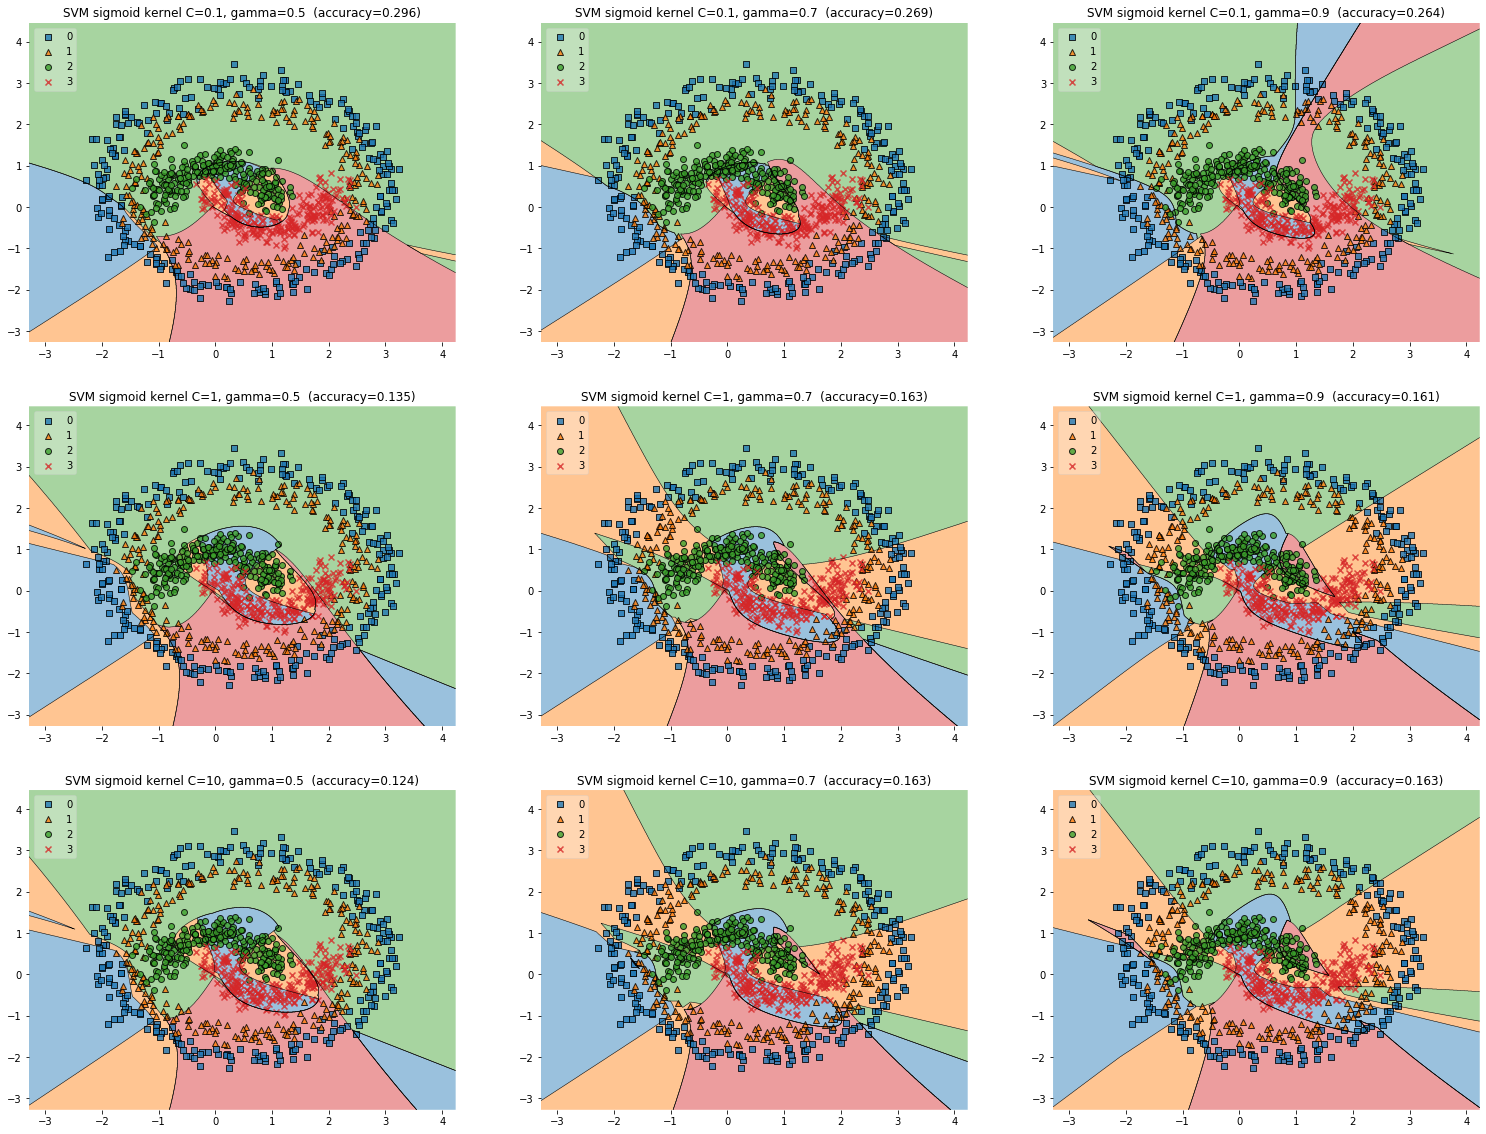

In [14]:
Cs = [0.1, 1, 10]
gammas = [0.5, 0.7, 0.9]
models = [SVC(kernel='sigmoid', C=c, gamma=g) for c in Cs for g in gammas]
labels_ = [f'SVM sigmoid kernel C={c}, gamma={g}' for c in Cs for g in gammas]

gs = gridspec.GridSpec(3, 3)
fig = plt.figure(figsize=(26, 20))

for clf, lab, grd in zip(models,
                         labels_,
                         itertools.product([0, 1, 2],
                         repeat=2)):
    clf.fit(points, labels)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=points, y=labels, clf=clf, legend=2)
    accuracy = accuracy_score(labels, clf.predict(points))
    plt.title(lab + f'  (accuracy={accuracy})')
plt.show()

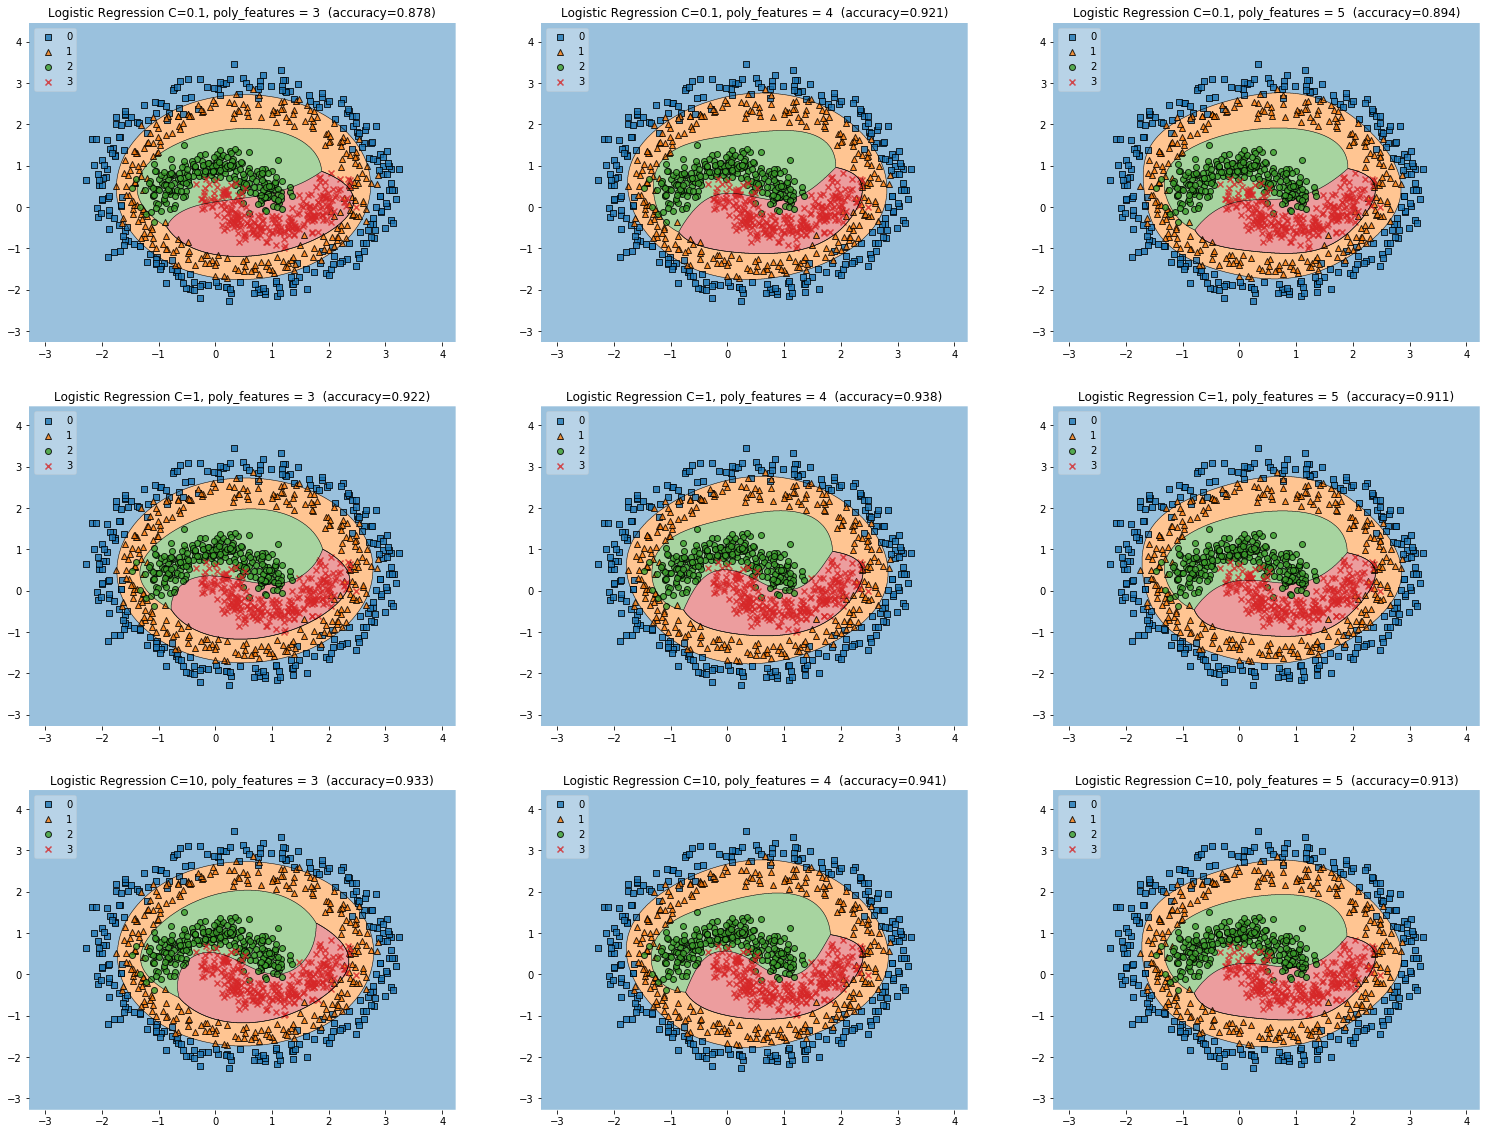

In [16]:
Cs = [0.1, 1, 10]
degrees = [3, 4, 5]
models = [make_pipeline(PolynomialFeatures(degree), \
LogisticRegression(multi_class='multinomial',
                   solver='sag', C=c, max_iter=10000)) for c in Cs for degree in degrees]
labels_ = [f'Logistic Regression C={c}, poly_features = {degree}' for c in Cs for degree in degrees]

gs = gridspec.GridSpec(3, 3)
fig = plt.figure(figsize=(26, 20))

for clf, lab, grd in zip(models,
                         labels_,
                         itertools.product([0, 1, 2],
                         repeat=2)):
    clf.fit(points, labels)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=points, y=labels, clf=clf, legend=2)
    accuracy = accuracy_score(labels, clf.predict(points))
    plt.title(lab + f'  (accuracy={accuracy})')
plt.show()

__Выводы__

В работе стандартно использовал 3 типа ядра SVM и модель с логистической регрессий. 
По результатам исследования модели с ядрами poly and sigmoid - не подходят для данной задачи.

SVM rbf kernel and Logistic Regression are the best ones. But the leader today is SVM rbf kernel с C=10, gamma=0.7 (accuracy = 0.944).